In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score


In [0]:
#reading the clean listing data
df = pd.read_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')
df.shape

(13936, 48)

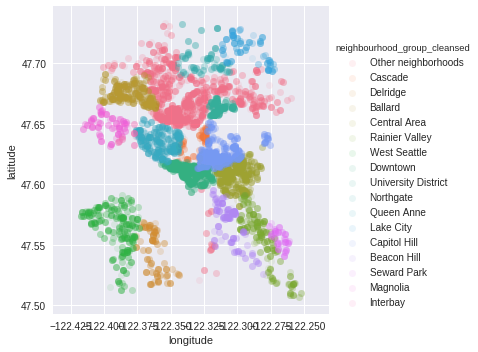

In [0]:
sns.lmplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed', 
            data=df, 
           fit_reg=False, scatter_kws={'alpha':0.1})

# Data Enrichment - Adding Restaurants & Attraction Data - Lalitha & Rajshree

In [0]:
df_restaurants = pd.read_csv('/content/drive/Team Drives/Tensors/listing_data_restaurants.csv')
df_restaurants.shape

(13947, 56)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'No of restaurants in Each Neighbourhood')

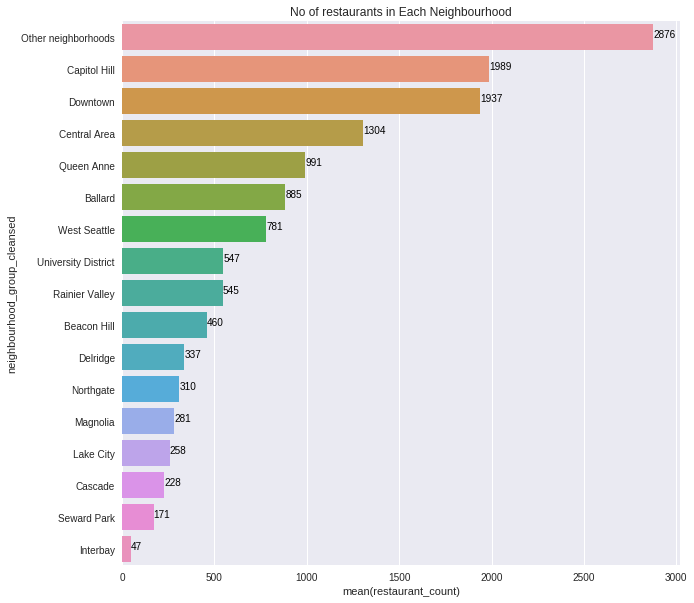

In [0]:
neighbor_restaurant_rank = df_restaurants.groupby(by='neighbourhood_group_cleansed').count()[['restaurant_count']].sort_values(by='restaurant_count', ascending=False)

plt.figure(figsize=(10,10))
g = sns.barplot(y=neighbor_restaurant_rank.index,x=neighbor_restaurant_rank["restaurant_count"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighbor_restaurant_rank["restaurant_count"])]
plt.title('No of restaurants in Each Neighbourhood')

In [0]:
encoded_data = pd.DataFrame({}) 
abridge_columns = df_restaurants[['bedrooms','beds', 'bathrooms','accommodates','restaurant_count','Superhost_final']]
# Iterating over all columns
for column in abridge_columns.columns:
    # Checking if column has type 'object'
    if abridge_columns[column].dtype == np.dtype('object'):
        # using one-hot encoding for this column
        encoding = pd.get_dummies(abridge_columns[column])
        # append expanded attribute to data frame
        encoded_data = pd.concat([encoded_data, encoding], axis=1)
    else:
        encoded_data = pd.concat([encoded_data, abridge_columns[[column]]], axis=1)


In [0]:
y = df_restaurants['price'].astype('float64')
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size = 0.25, random_state=1)

## Linear Regression

In [0]:
model_restaurant_linear = linear_model.LinearRegression()
model_restaurant_linear.fit(X_train, y_train)

predictions_restaurants_linear = model_restaurant_linear.predict(X_test) 
predictions_restaurants_linear

array([301.24680463,  79.08643322, 114.04645424, ..., 172.38645794,
       151.37200185,  79.08643322])

In [0]:
print('Score:', model_restaurant_linear.score(X_test, y_test))

Score: 0.5716002739101285


## Random Forest Regressor

In [0]:
model_restaurant_random =  RandomForestRegressor()
model_restaurant_random.fit(X_train, y_train)

predictions_restaurant_random = model_restaurant_random.predict(X_test) 
predictions_restaurant_random

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([357.29166667,  72.1       , 105.40833333, ..., 154.02777778,
       154.25873016,  72.1       ])

In [0]:
print('Score:', model_restaurant_random.score(X_test, y_test))

Score: 0.8814434058972955


## Decision Tree Regressor

In [0]:
model_restaurant_dt =  DecisionTreeRegressor()
model_restaurant_dt.fit(X_train, y_train)

predictions_restaurant_dt = model_restaurant_dt.predict(X_test) 
predictions_restaurant_dt

array([366.66666667,  65.        , 110.        , ..., 175.        ,
       142.        ,  65.        ])

In [0]:
print('Score:', model_restaurant_dt.score(X_test, y_test))

Score: 0.8764859040205277


## Gradient Boosting Regressor

In [0]:
model_restaurant_gradient =  GradientBoostingRegressor()
model_restaurant_gradient.fit(X_train, y_train)

predictions_restaurant_gradient = model_restaurant_gradient.predict(X_test) 
predictions_restaurant_gradient

array([285.54407002,  83.65566042,  83.11757832, ..., 150.73867806,
       160.28599164,  83.65566042])

In [0]:
print('Score:', model_restaurant_gradient.score(X_test, y_test))

Score: 0.6756584079491026


## XG Boost Regressor

In [0]:
model_restaurant_xgb = XGBRegressor(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)


model_restaurant_xgb.fit(X_train, y_train)
predictions_restaurant_xgb = model_restaurant_xgb.predict(X_test) 
predictions_restaurant_xgb

array([366.66663 ,  65.00129 , 109.999825, ..., 174.99977 , 142.00005 ,
        65.00129 ], dtype=float32)

In [0]:
print('Score:', model_restaurant_xgb.score(X_test, y_test))

Score: 0.8835393477978664


## Comparison of the performance of various models

In [0]:
Comparison = pd.DataFrame({
                           'Linear':[model_restaurant_linear.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_restaurants_linear,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_restaurants_linear),np.sqrt(mean_squared_error(y_test, predictions_restaurants_linear)),r2_score(y_test, predictions_restaurants_linear),explained_variance_score (y_test, predictions_restaurants_linear)],
                           'Random Forest':[model_restaurant_random.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_restaurant_random,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_restaurant_random),np.sqrt(mean_squared_error(y_test, predictions_restaurant_random)),r2_score(y_test, predictions_restaurant_random),explained_variance_score (y_test, predictions_restaurant_random)],
                           'Decision Tree':[model_restaurant_dt.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_restaurant_dt,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_restaurant_dt),np.sqrt(mean_squared_error(y_test, predictions_restaurant_dt)),r2_score(y_test, predictions_restaurant_dt),explained_variance_score (y_test, predictions_restaurant_dt)],
                           'GradientB':[model_restaurant_gradient.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_restaurant_gradient,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_restaurant_gradient),np.sqrt(mean_squared_error(y_test, predictions_restaurant_gradient)),r2_score(y_test, predictions_restaurant_gradient),explained_variance_score (y_test, predictions_restaurant_gradient)],
                           'XGB':[model_restaurant_xgb.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_restaurant_xgb,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_restaurant_xgb),np.sqrt(mean_squared_error(y_test, predictions_restaurant_xgb)),r2_score(y_test, predictions_restaurant_xgb),explained_variance_score (y_test, predictions_restaurant_xgb)],
                                          })

Comparison.rename(index={0:'Accuracy' ,1:'MSE',2: 'MAE',3:'RMSE',4: 'R2-score'}, inplace=True)
Comparison.head()

,Decision Tree,GradientB,Linear,Random Forest,XGB
Accuracy,87.648590,67.565841,57.160027,88.144341,88.353935
MSE,1232.058398,3235.321275,4273.305619,1182.607105,1161.699995
MAE,14.989467,37.269957,43.248036,15.997294,14.630421
RMSE,35.100689,56.879885,65.370526,34.389055,34.083720
R2-score,0.876486,0.675658,0.571600,0.881443,0.883539


# Data Enrichment - Adding Seattle  Crime Data - Yee Zhian & Sowndhariya

While there are many aspects to consider when searching for a rental apartment/home, the crime record in the neighborhood is often the most overlooked and difficult to answer. Yet, anyone who has experienced this, will tell you how dangerous it is to stay at a place where crime rate is high. 

In [0]:
crime_data = pd.read_csv('/content/drive/Team Drives/Tensors/crime_data.csv')
crime_data.columns

Index(['Report Number', 'Occurred Date', 'Occurred Time', 'Reported Date',
       'Reported Time', 'Crime Subcategory', 'Primary Offense Description',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

In [0]:
crime_data.Neighborhood.unique()

array(['LAKEWOOD/SEWARD PARK', 'UNKNOWN', 'CENTRAL AREA/SQUIRE PARK',
       'BRIGHTON/DUNLAP', 'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'SLU/CASCADE',
       'CLAREMONT/RAINIER VISTA', 'HIGH POINT', 'SODO',
       'DOWNTOWN COMMERCIAL', 'FIRST HILL',
       'JUDKINS PARK/NORTH BEACON HILL', 'NORTH ADMIRAL', 'MILLER PARK',
       'HILLMAN CITY', 'MORGAN', 'SOUTH PARK', 'MONTLAKE/PORTAGE BAY',
       'CAPITOL HILL', 'NORTHGATE', 'LAKECITY', 'NEW HOLLY',
       'RAINIER BEACH', 'QUEEN ANNE', 'RAINIER VIEW', 'BELLTOWN',
       'ROOSEVELT/RAVENNA', 'ALASKA JUNCTION', 'GREENWOOD',
       'PIONEER SQUARE', 'NORTH BEACON HILL', 'GEORGETOWN',
       'SOUTH DELRIDGE', 'HIGHLAND PARK', 'BITTERLAKE', 'MOUNT BAKER',
       'MADRONA/LESCHI', 'COLUMBIA CITY', 'NORTH DELRIDGE', 'FREMONT',
       'MID BEACON HILL', 'BALLARD NORTH', 'BALLARD SOUTH',
       'PHINNEY RIDGE', 'SANDPOINT', 'MAGNOLIA', 'UNIVERSITY',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'WALLINGFORD',
       'EASTLAKE - WEST', 'SOUTH BEACON H

In [0]:
# Data Cleaning
# renaming the neighborhood names 

crime_data.loc[crime_data['Neighborhood'] == 'SOUTH DELRIDGE', 'Neighborhood'] = 'Delridge'
crime_data.loc[crime_data['Neighborhood'] == 'NORTH DELRIDGE', 'Neighborhood'] = 'Delridge'
crime_data.loc[crime_data['Neighborhood'] == 'CAPITOL HILL', 'Neighborhood'] = 'Capitol Hill'

crime_data.loc[crime_data['Neighborhood'] == 'DOWNTOWN COMMERCIAL', 'Neighborhood'] = 'Downtown'
crime_data.loc[crime_data['Neighborhood'] == 'BALLARD NORTH', 'Neighborhood'] = 'Ballard'
crime_data.loc[crime_data['Neighborhood'] == 'BALLARD SOUTH', 'Neighborhood'] = 'Ballard'
crime_data.loc[crime_data['Neighborhood'] == 'CENTRAL AREA/SQUIRE PARK', 'Neighborhood'] = 'Central Area'

crime_data.loc[crime_data['Neighborhood'] == 'CLAREMONT/RAINIER VISTA', 'Neighborhood'] = 'Rainier Valley'
crime_data.loc[crime_data['Neighborhood'] == 'RAINIER BEACH', 'Neighborhood'] = 'Rainier Valley'
crime_data.loc[crime_data['Neighborhood'] == 'RAINIER VIEW', 'Neighborhood'] = 'Rainier Valley'

crime_data.loc[crime_data['Neighborhood'] == 'LAKECITY', 'Neighborhood'] = 'Lake City'
crime_data.loc[crime_data['Neighborhood'] == 'QUEEN ANNE', 'Neighborhood'] = 'Queen Anne'
crime_data.loc[crime_data['Neighborhood'] == 'NORTHGATE', 'Neighborhood'] = 'Northgate'
crime_data.loc[crime_data['Neighborhood'] == 'LAKEWOOD/SEWARD PARK', 'Neighborhood'] = 'Seward Park'

crime_data.loc[crime_data['Neighborhood'] == 'JUDKINS PARK/NORTH BEACON HILL', 'Neighborhood'] = 'Beacon Hill'
crime_data.loc[crime_data['Neighborhood'] == 'NORTH BEACON HILL', 'Neighborhood'] = 'Beacon Hill'
crime_data.loc[crime_data['Neighborhood'] == 'MID BEACON HILL', 'Neighborhood'] = 'Beacon Hill'
crime_data.loc[crime_data['Neighborhood'] == 'SOUTH BEACON HILL', 'Neighborhood'] = 'Beacon Hill'

crime_data.loc[crime_data['Neighborhood'] == 'UNIVERSITY', 'Neighborhood'] = 'University District'
crime_data.loc[crime_data['Neighborhood'] == 'MAGNOLIA', 'Neighborhood'] = 'Magnolia'
crime_data.loc[crime_data['Neighborhood'] == 'SLU/CASCADE', 'Neighborhood'] = 'Cascade'

In [0]:
# considering records for 2018 and after.

crime_data['Reported Date'] = pd.to_datetime(crime_data['Reported Date'])

crime_data = crime_data.loc[crime_data['Reported Date'] > '01/01/2018']

In [0]:
neighbourhood_group_cleansed = df['neighbourhood_group_cleansed'].unique()

In [0]:
# considering all the neighborhoods in the airbnb data only.

crime_data_neighborhood = crime_data.loc[crime_data['Neighborhood'].isin(neighbourhood_group_cleansed)]
crime_data_neighborhood.shape

(32422, 11)

In [0]:
crime_data_rank = crime_data_neighborhood.groupby(by='Neighborhood').count()[['Crime Subcategory']].sort_values(by='Crime Subcategory', ascending=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of Crime Records in Each Neighbourhood')

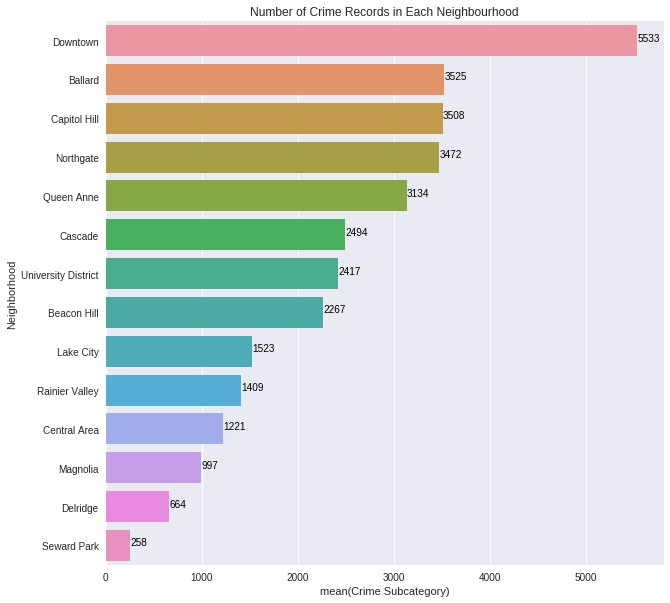

In [0]:
plt.figure(figsize=(10,10))
g = sns.barplot(y=crime_data_rank.index,x=crime_data_rank["Crime Subcategory"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), crime_data_rank["Crime Subcategory"])]
plt.title('Number of Crime Records in Each Neighbourhood')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood')

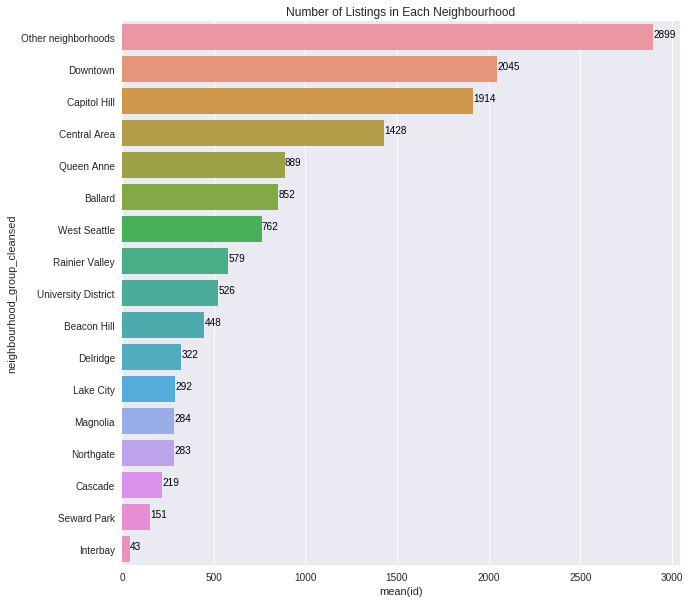

In [0]:
neighbor_listing_rank = df.groupby(by='neighbourhood_group_cleansed').count()[['id']].sort_values(by='id', ascending=False)

plt.figure(figsize=(10,10))
g = sns.barplot(y=neighbor_listing_rank.index,x=neighbor_listing_rank["id"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighbor_listing_rank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Mean Listing Price in each neighborhood')

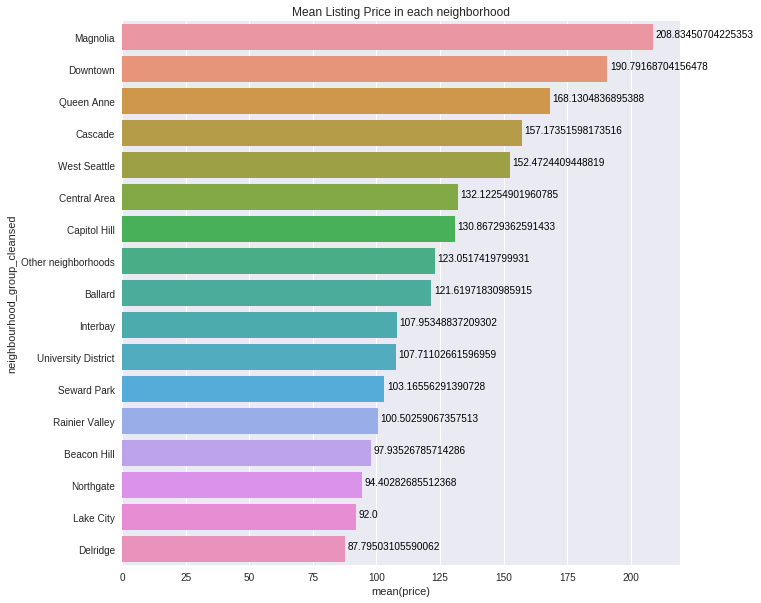

In [0]:
neighbor_price_rank = df.groupby(by='neighbourhood_group_cleansed').mean()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(10,10))
g = sns.barplot(y=neighbor_price_rank.index,x=neighbor_price_rank["price"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighbor_price_rank["price"])]
plt.title('Mean Listing Price in each neighborhood')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Occupancy Rate in Each Neighbourhood')

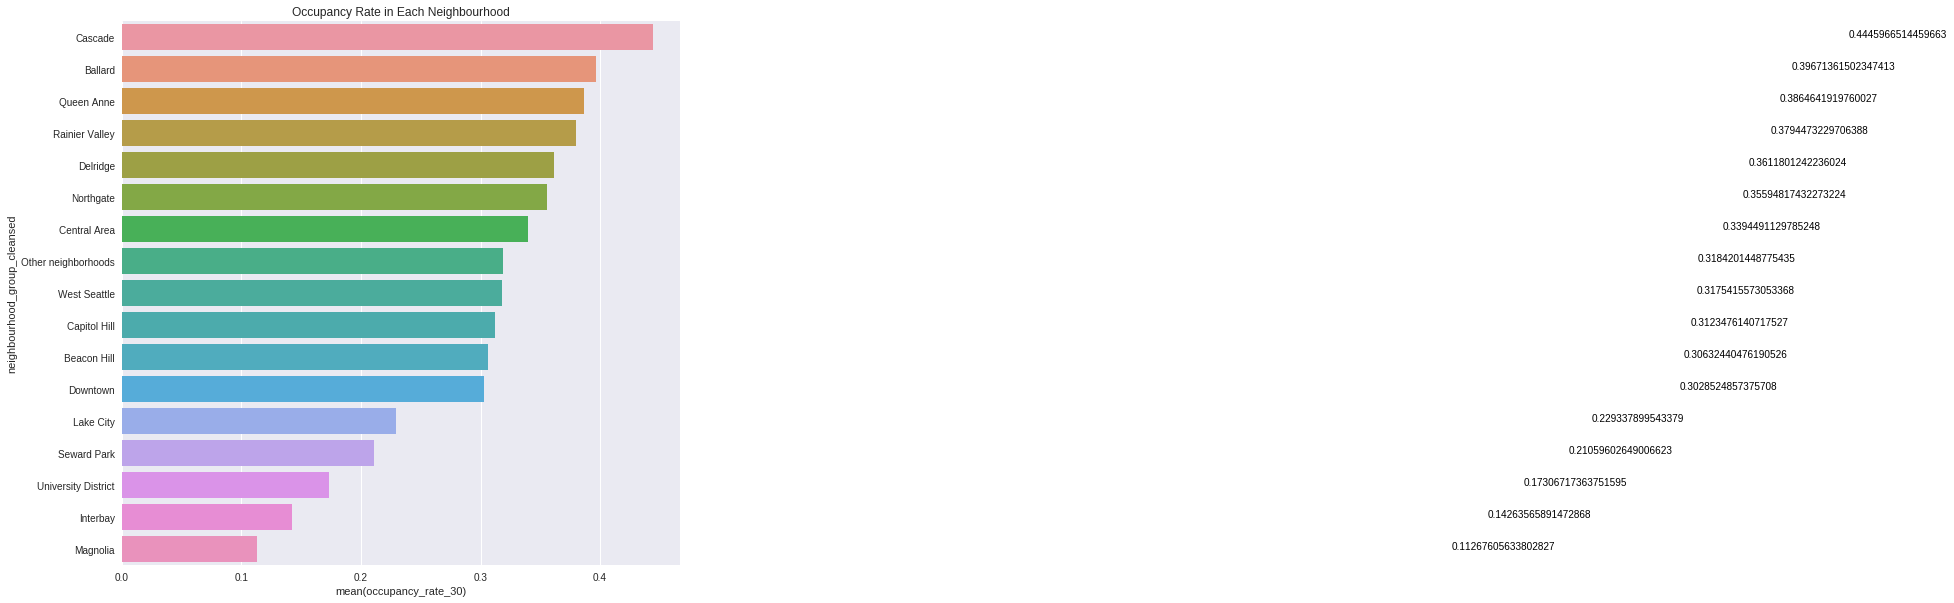

In [0]:
neighbor_popularity_rank = df.groupby(by='neighbourhood_group_cleansed').mean()[['occupancy_rate_30']].sort_values(by='occupancy_rate_30', ascending=False)

plt.figure(figsize=(10,10))
g = sns.barplot(y=neighbor_popularity_rank.index,x=neighbor_popularity_rank["occupancy_rate_30"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighbor_popularity_rank["occupancy_rate_30"])]
plt.title('Occupancy Rate in Each Neighbourhood')

 We plotted various neighborhoods against crime records, number of listings, price and occupancy rate in each neighborhood.
 
We see that the Downtown, Ballard, Capitol Hills and North Gate neighborhoods have the maximum number of crime records.
However, the interesting part is Ballard and North Gate are still the most popular nieghborhood with hightest occupancy rate. The mean price of listings in these neighborhood are not very high.

Travellers are often looking for fairly priced accomodations and threfore they choose these neighborhood.
 
Downtown and Capitol hills have lesser popularity or say the occupancy rate in these neighborhood is less despite of high number of listings. The reason seems to be the high listing price in these neighborhood.

For investment purpose, we would really prefer a good compromise between these.
We see that the central area has low crime rate and the number of listings, mean price and popularity is higher.


In [0]:
crime_data_rank = crime_data_rank.reset_index(level='Neighborhood')

crime_data_rank 

,Neighborhood,Crime Subcategory
0,Downtown,5533
1,Ballard,3525
2,Capitol Hill,3508
3,Northgate,3472
4,Queen Anne,3134
5,Cascade,2494
6,University District,2417
7,Beacon Hill,2267
8,Lake City,1523
9,Rainier Valley,1409


In [0]:
# merging the airbnb and crime data
merged_crime_df = crime_data_rank.merge(df_restaurants, left_on='Neighborhood', right_on='neighbourhood_group_cleansed')

In [0]:
#merged_crime_df.to_csv('merged_crime_df.csv')

merged_crime_df.shape

(10243, 58)

In [0]:
encoded_data_crime = pd.DataFrame({}) 
my_features_enriched_crime = merged_crime_df[['bedrooms','beds', 'bathrooms','accommodates','Superhost_final','Crime Subcategory','restaurant_count']]
# Iterating over all columns
for column in my_features_enriched_crime.columns:
    # Checking if column has type 'object'
    if my_features_enriched_crime[column].dtype == np.dtype('object'):
        # using one-hot encoding for this column
        encoding_merged_crime = pd.get_dummies(my_features_enriched_crime[column])
        # append expanded attribute to data frame
        encoded_data_crime = pd.concat([encoded_data_crime, encoding_merged_crime], axis=1)
    else:
        encoded_data_crime = pd.concat([encoded_data_crime, my_features_enriched_crime[[column]]], axis=1)



In [0]:
y = merged_crime_df['price'].astype('float64')
X_train, X_test, y_train, y_test = train_test_split(encoded_data_crime, y, test_size = 0.25, random_state=1)

## Linear Regression

In [0]:
model_crime_linear = linear_model.LinearRegression()
model_crime_linear.fit(X_train, y_train)

predictions_crime_linear = model_crime_linear.predict(X_test) 
predictions_crime_linear

array([181.66199503, 100.38071537,  69.78312064, ...,  71.34413186,
       169.18170777, 108.31468558])

In [0]:
print('Score:', model_crime_linear.score(X_test, y_test))
model_crime_linear_score = model_crime_linear.score(X_test, y_test)

Score: 0.5900549305023296


## Random Forest Regressor

In [0]:
model_crime_random =  RandomForestRegressor()
model_crime_random.fit(X_train, y_train)

predictions_crime_random = model_crime_random.predict(X_test) 
predictions_crime_random

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([179.07      ,  92.11666667,  73.425     , ...,  65.17857143,
       169.0175    ,  72.08571429])

In [0]:
print('Score:', model_crime_random.score(X_test, y_test))
model_crime_random_score = model_crime_random.score(X_test, y_test)

Score: 0.8662226327085351


## Decision Tree Regressor

In [0]:
model_crime_dt =  DecisionTreeRegressor()
model_crime_dt.fit(X_train, y_train)

predictions_crime_dt = model_crime_dt.predict(X_test) 
predictions_crime_dt

array([179.33333333,  95.        ,  73.33333333, ...,  65.        ,
       174.        ,  71.        ])

In [0]:
print('Score:', model_crime_dt.score(X_test, y_test))

Score: 0.8730254133380687


## Gradient Boosting Regressor

In [0]:
model_crime_gradient =  GradientBoostingRegressor()
model_crime_gradient.fit(X_train, y_train)

predictions_crime_gradient = model_crime_gradient.predict(X_test) 
predictions_crime_gradient

array([174.862674  , 131.66790238,  77.31559507, ...,  70.44673287,
       167.85609978,  86.59978081])

In [0]:
print('Score:', model_crime_gradient.score(X_test, y_test))

Score: 0.7388188364973893


## XG Boost Regressor

In [0]:
model_crime_xgb = XGBRegressor(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)


model_crime_xgb.fit(X_train, y_train)
predictions_crime_xgb = model_crime_xgb.predict(X_test) 
predictions_crime_xgb

array([179.3335  ,  95.00012 ,  73.333374, ...,  65.00004 , 173.99948 ,
        70.999886], dtype=float32)

In [0]:
print('Score:', model_crime_xgb.score(X_test, y_test))

Score: 0.8735562922119591


## Comparison of the performance of various models

In [0]:
Comparison = pd.DataFrame({
                           'Linear':[model_crime_linear.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_crime_linear,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_crime_linear),np.sqrt(mean_squared_error(y_test, predictions_crime_linear)),r2_score(y_test, predictions_crime_linear),explained_variance_score (y_test, predictions_crime_linear)],
                           'Random Forest':[model_crime_random.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_crime_random,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_crime_random),np.sqrt(mean_squared_error(y_test, predictions_crime_random)),r2_score(y_test, predictions_crime_random),explained_variance_score (y_test, predictions_crime_random)],
                           'Decision Tree':[model_crime_dt.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_crime_dt,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_crime_dt),np.sqrt(mean_squared_error(y_test, predictions_crime_dt)),r2_score(y_test, predictions_crime_dt),explained_variance_score (y_test, predictions_crime_dt)],
                           'GradientB':[model_crime_gradient.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_crime_gradient,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_crime_gradient),np.sqrt(mean_squared_error(y_test, predictions_crime_gradient)),r2_score(y_test, predictions_crime_gradient),explained_variance_score (y_test, predictions_crime_gradient)],
                           'XGB':[model_crime_xgb.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_crime_xgb,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_crime_xgb),np.sqrt(mean_squared_error(y_test, predictions_crime_xgb)),r2_score(y_test, predictions_crime_xgb),explained_variance_score (y_test, predictions_crime_xgb)],
                                          })

Comparison.rename(index={0:'Accuracy' ,1:'MSE',2: 'MAE',3:'RMSE',4: 'R2-score'}, inplace=True)
Comparison.head()

,Decision Tree,GradientB,Linear,Random Forest,XGB
Accuracy,87.302541,73.881884,59.005493,86.622263,87.355629
MSE,1548.545741,3185.290766,4999.572814,1631.510508,1542.071294
MAE,15.508694,35.344150,43.579567,17.175247,15.411541
RMSE,39.351566,56.438380,70.707657,40.391961,39.269216
R2-score,0.873025,0.738819,0.590055,0.866223,0.873556


# Data Enrichment - Adding Seattle Housing Market Data - Lalitha & Rajshree

In [0]:
house_data = pd.read_csv('/content/drive/Team Drives/Tensors/house_neighborhood_zipcode_cleaned.csv')

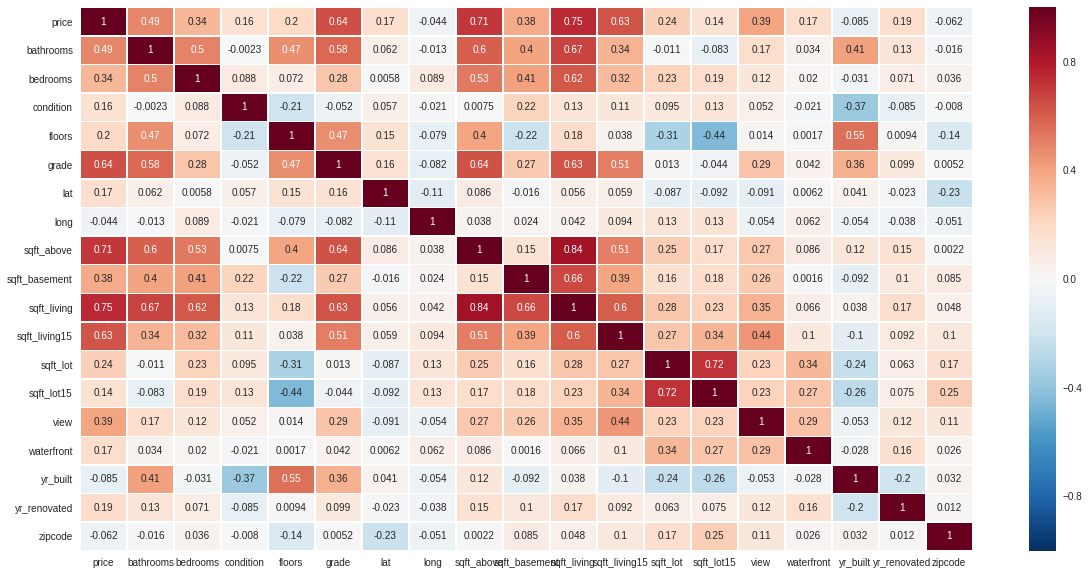

In [0]:
#Subsetting the housing market data
Cor = house_data[['price','bathrooms', 'bedrooms','condition', 'floors', 'grade', 'lat', 'long',
          'sqft_above', 'sqft_basement', 'sqft_living','sqft_living15', 'sqft_lot',
          'sqft_lot15', 'view','waterfront', 'yr_built',
          'yr_renovated','neighborhood', 'zipcode']] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
 #Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(cor,annot=True,linewidths=.5, ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Mean Sale Price in each neighborhood')

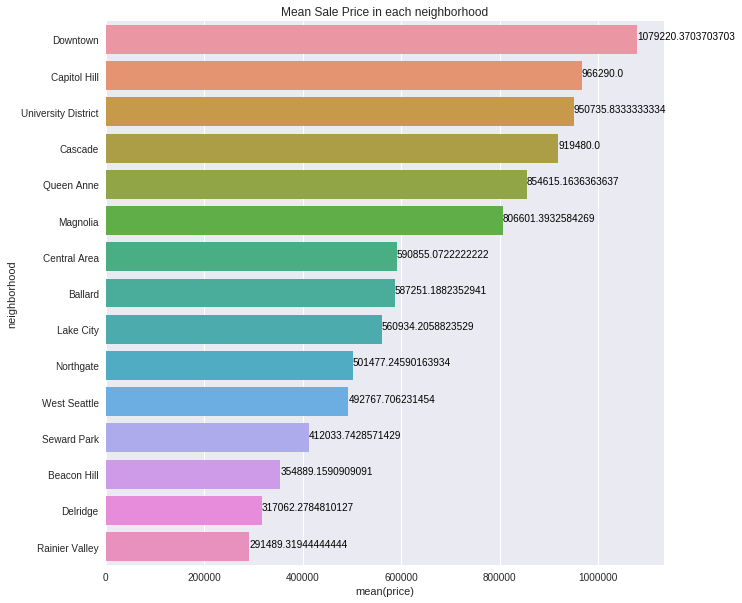

In [0]:
neighbor_house_price_rank = house_data.groupby(by='neighborhood').mean()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(10,10))
g = sns.barplot(y=neighbor_house_price_rank.index,x=neighbor_house_price_rank["price"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighbor_house_price_rank["price"])]
plt.title('Mean Sale Price in each neighborhood')

In [0]:
print(house_data.shape)
airbnb_data = merged_crime_df.sample(n=1000, random_state=1)
print(airbnb_data.shape)

(2000, 22)
(1000, 58)


In [0]:
# data cleaning: removing zipcode with string values
indexNames = airbnb_data[airbnb_data['zipcode'] =='99\n98122' ].index
airbnb_data.drop(indexNames , inplace=True)

In [0]:
# converting the zipcode as integers for joining the datasets
house_data['zipcode'] = house_data['zipcode'].astype(int)
airbnb_data['zipcode'] = airbnb_data['zipcode'].astype(int)

In [0]:
# merging both the datasets on zipcode
mergeddf = pd.merge(house_data,airbnb_data, on='zipcode', how="inner")
mergeddf.shape

(63798, 79)

In [0]:
encoded_data_house = pd.DataFrame({}) 
my_features_enriched = mergeddf[['bedrooms_y', 'beds',  'bathrooms_y', 'accommodates', 'Superhost_final','sqft_living','grade', 'restaurant_count', 'Crime Subcategory']]

for column in my_features_enriched.columns:
    # Checking if column has type 'object'
    if my_features_enriched[column].dtype == np.dtype('object'):
        # using one-hot encoding for this column
        encoding_merged_house = pd.get_dummies(my_features_enriched[column])
        # append expanded attribute to data frame
        encoded_data_house = pd.concat([encoded_data_house, encoding_merged_house], axis=1)
    else:
        encoded_data_house = pd.concat([encoded_data_house, my_features_enriched[[column]]], axis=1)
encoded_data_house.head()

y = mergeddf['price_y'].astype('float64') 
X_train, X_test, y_train, y_test = train_test_split(encoded_data_house, y, test_size = 0.25, random_state=1)

## Linear Regression

In [0]:
model_house_linear = linear_model.LinearRegression()
model_house_linear.fit(X_train, y_train)

predictions_house_linear = model_house_linear.predict(X_test) 
predictions_house_linear

array([ 79.6619899 ,  64.80114167, 101.24065575, ..., 233.8250364 ,
        78.54029211, 259.00722181])

In [0]:
print('Score:', model_house_linear.score(X_test, y_test))
model_house_linear_score = model_house_linear.score(X_test, y_test)

Score: 0.6622894629574645


## Random Forest Regressor

In [0]:
model_house_random =  RandomForestRegressor()
model_house_random.fit(X_train, y_train)

predictions_house_random = model_house_random.predict(X_test) 
predictions_house_random

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 75.        ,  36.        , 120.26666667, ..., 175.        ,
        84.        , 160.        ])

In [0]:
print('Score:', model_house_random.score(X_test, y_test))
model_house_random_score = model_house_random.score(X_test, y_test)

Score: 0.943983336495912


## Decision Tree Regressor

In [0]:
model_house_dt =  DecisionTreeRegressor()
model_house_dt.fit(X_train, y_train)

predictions_house_dt = model_house_dt.predict(X_test) 
predictions_house_dt

array([ 75.  ,  36.  , 116.25, ..., 175.  ,  85.  , 160.  ])

In [0]:
print('Score:', model_house_dt.score(X_test, y_test))
model_house_dt_score = model_house_dt.score(X_test, y_test)

Score: 0.9267752981425206


## Gradient Boosting Regressor

In [0]:
model_house_gradient =  GradientBoostingRegressor()
model_house_gradient.fit(X_train, y_train)

predictions_house_gradient = model_house_gradient.predict(X_test) 
predictions_house_gradient

array([ 84.81740465,  52.22210609,  94.29746354, ..., 187.56123168,
        83.63746003, 284.38099382])

In [0]:
print('Score:', model_house_gradient.score(X_test, y_test))
model_house_gradient_score = model_house_gradient.score(X_test, y_test)

Score: 0.8287665568385172


## XG Boost Regressor

In [0]:
model_house_xgb =  XGBRegressor()
model_house_xgb.fit(X_train, y_train)

predictions_house_xgb = model_house_xgb.predict(X_test) 
predictions_house_xgb

array([ 84.174545,  51.668842,  94.90204 , ..., 184.7266  ,  82.99604 ,
       282.72235 ], dtype=float32)

In [0]:
print('Score:', model_house_xgb.score(X_test, y_test))
model_house_xgb_score = model_house_xgb.score(X_test, y_test)

Score: 0.8309002271436237


## Comparison of the performance of various models

In [0]:
Comparison = pd.DataFrame({
                           'Linear':[model_house_linear.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_house_linear,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_house_linear),np.sqrt(mean_squared_error(y_test, predictions_house_linear)),r2_score(y_test, predictions_house_linear),explained_variance_score (y_test, predictions_house_linear)],
                           'Random Forest':[model_house_random.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_house_random,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_house_random),np.sqrt(mean_squared_error(y_test, predictions_house_random)),r2_score(y_test, predictions_house_random),explained_variance_score (y_test, predictions_house_random)],
                           'Decision Tree':[model_house_dt.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_house_dt,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_house_dt),np.sqrt(mean_squared_error(y_test, predictions_house_dt)),r2_score(y_test, predictions_house_dt),explained_variance_score (y_test, predictions_house_dt)],
                           'GradientB':[model_house_gradient.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_house_gradient,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_house_gradient),np.sqrt(mean_squared_error(y_test, predictions_house_gradient)),r2_score(y_test, predictions_house_gradient),explained_variance_score (y_test, predictions_house_gradient)],
                           'XGB':[model_house_xgb.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_house_xgb,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_house_xgb),np.sqrt(mean_squared_error(y_test, predictions_house_xgb)),r2_score(y_test, predictions_house_xgb),explained_variance_score (y_test, predictions_house_xgb)],
                                          })

Comparison.rename(index={0:'Accuracy' ,1:'MSE',2: 'MAE',3:'RMSE',4: 'R2-score'}, inplace=True)
Comparison.head()

,Decision Tree,GradientB,Linear,Random Forest,XGB
Accuracy,92.677530,82.876656,66.228946,94.398334,83.090023
MSE,798.396079,1867.021732,3682.183224,610.770456,1843.757533
MAE,10.737199,27.714164,37.956423,10.157014,27.437996
RMSE,28.255903,43.209047,60.680996,24.713771,42.938998
R2-score,0.926775,0.828767,0.662289,0.943983,0.830900


## Plotting the performance of various models

In [0]:
estimators = [ model_house_linear_score , model_house_dt_score,
        model_house_random_score,  model_house_gradient_score, model_house_xgb_score]

estimators_labels = np.array(['Linear', 'Decision Tree', 'Random', 'Gradient', 'XG Boost'])

error_values = np.array([model_house_linear_score, model_house_dt_score, 
                         model_house_random_score, model_house_gradient_score, model_house_xgb_score])

position = np.arange(error_values.shape[0])
srt = np.argsort(error_values)

Text(0.5, 1.0, 'Performance of Different Models')

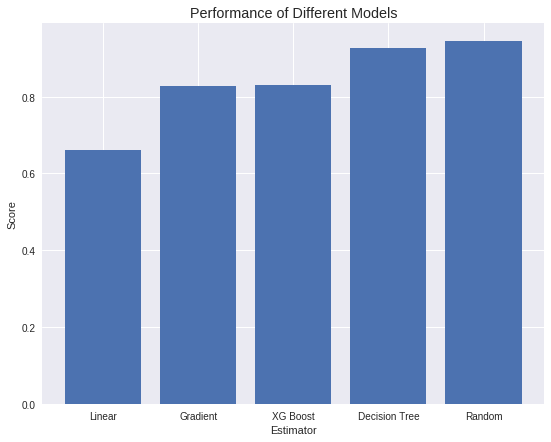

In [0]:
plt.figure(figsize=(9,7))
plt.bar(position, error_values[srt], align='center')

plt.style.use('ggplot')

plt.xticks(position, estimators_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Performance of Different Models')